In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
import sys
sys.path.insert(1, "../utilities")
from plot_utils import *
from extract import *

In [3]:
def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

In [31]:
fnum=3
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

cellshilicposGFstatus.csv
cellshilicposALPHA0.05FC1.0MINVAR0.125.csv


In [5]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True)

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

In [6]:
Area.shape

(58, 40)

In [7]:
data_significant.shape

(61, 128)

In [8]:
data_significant.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aSYN,aSYN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,Area: 221003_SarkaLehtonen_Hilic_pos_0088.raw ...,Area: 221003_SarkaLehtonen_Hilic_pos_0092.raw ...,...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...
4,Acetyl-L-carnitine,C9 H17 N O4,0.8,203.11592,204.1232,2.791,DDA for preferred ion,[M+H]+1,26.82393260341057,26.966564272710535,...,0,0,0,0,0,0,0,0,0,0
12,Nicotinamide,C6 H6 N2 O,2.49,122.04832,123.05559,0.665,No MS2,[M+H]+1,22.006117213600273,22.07771837617395,...,0,0,0,64,0,64,64,0,64,0


In [9]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])

In [10]:
data_significant.iloc[sorted_ind+3,:].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
94,NaN,C30 H57 N O4,-0.07,495.42873,496.436,0.372,No MS2,[M+H]+1,19.054911837856597,18.620844098722333,...,0,0,0,0,0,0,0,0,64,0
106,NaN,C30 H54 O4,-0.21,478.40211,496.436,0.373,No MS2,[M+NH4]+1,19.054911837856597,18.620844098722333,...,64,64,64,64,64,64,64,64,0,64
24,13-hydroxy-alpha-tocopherol,C29 H50 O3,0.19,446.37608,447.38325,0.374,DDA for preferred ion,[M+H]+1,20.88434273807616,20.704578329289475,...,0,0,0,0,0,0,0,0,0,0
303,MFCD09743629,C27 H48 O2,0.67,404.3657,405.3727,0.378,No MS2,[M+H]+1,16.552989929027294,16.172452223805614,...,128,8,8,128,8,128,128,128,128,128
245,NaN,C21 H49 N4 O3 P,1.94,436.35507,419.35186,0.381,No MS2,[M+H-H2O]+1,17.760054334192844,17.391996173856526,...,64,64,64,64,64,128,64,64,128,128


In [11]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]
mass=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]
#Area_sorted=Area_significant.iloc[sorted_ind,:]

In [12]:
cols=np.arange(5)
feature_ids = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])]

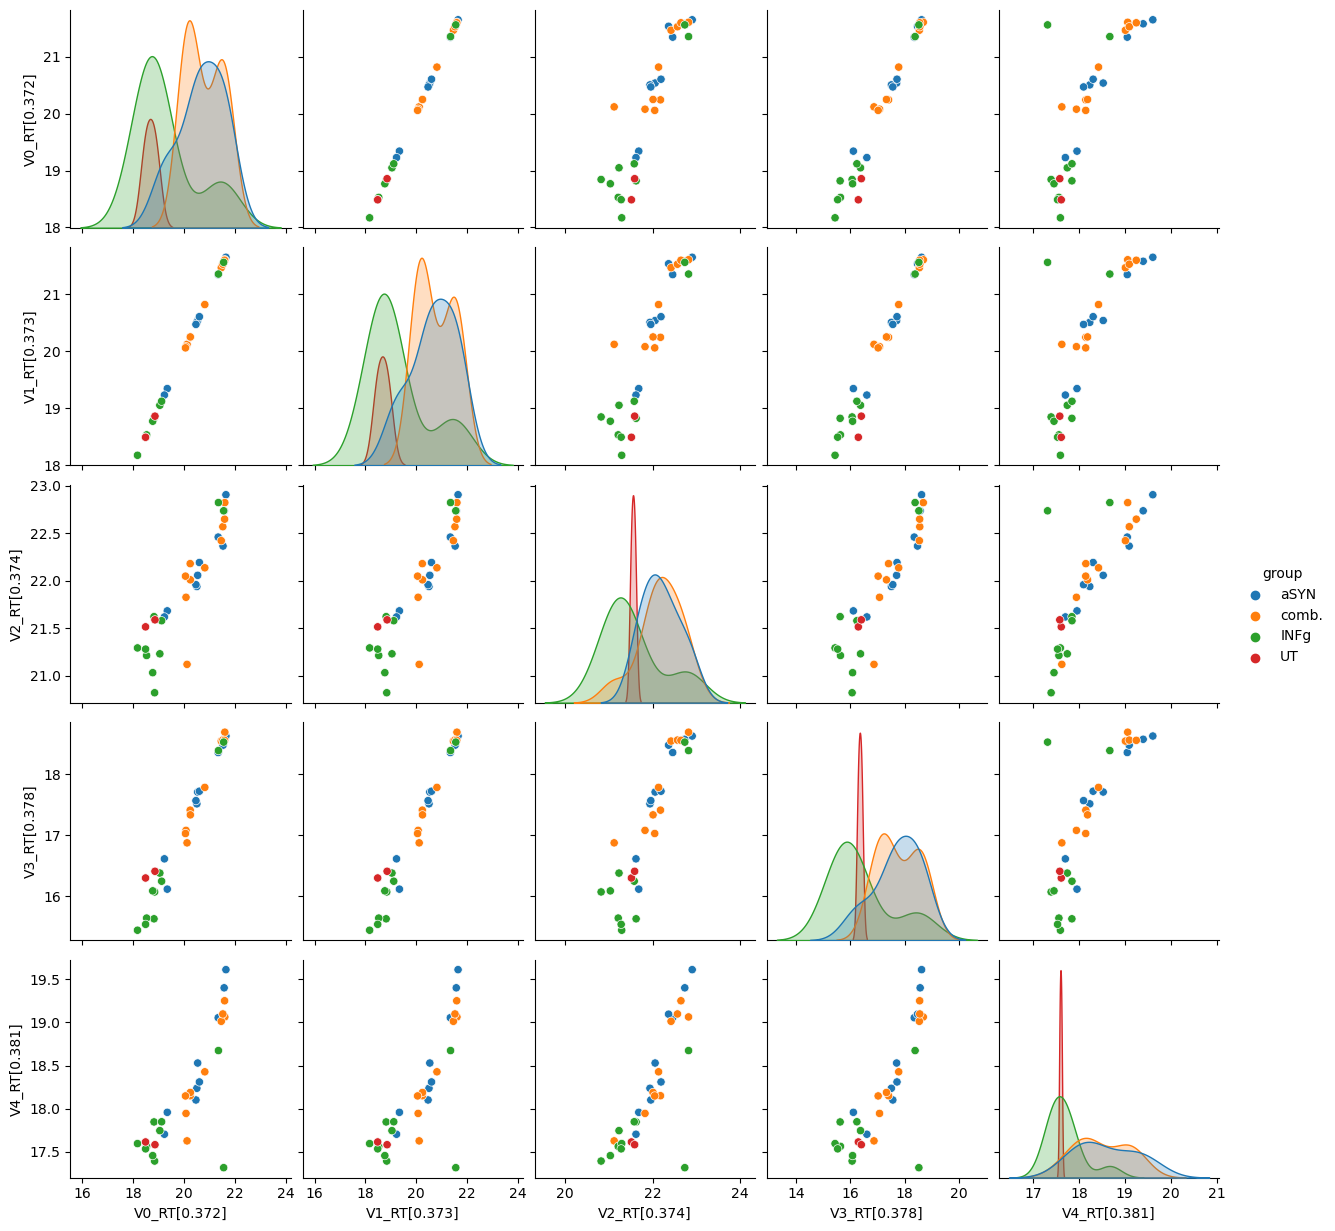

In [13]:
complete_pairplot(X[:,cols], groups, feature_ids)

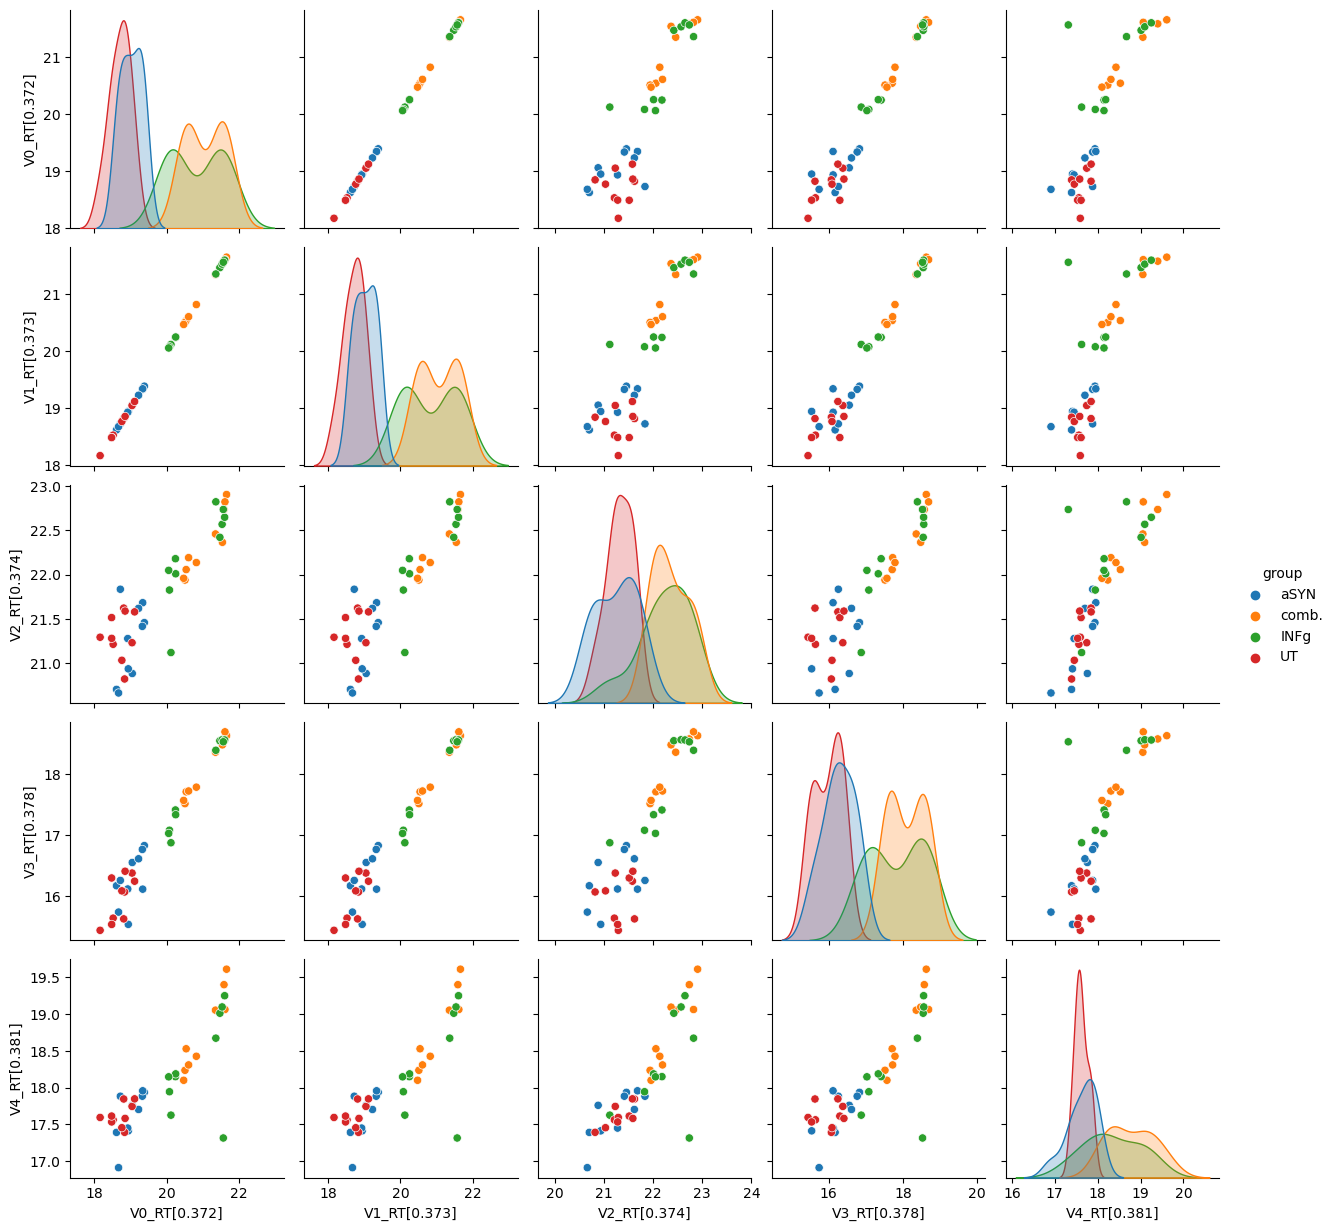

In [14]:
df_X = pd.DataFrame(X[:,cols], columns = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])])
df_X['group'] = groups.to_numpy(dtype=str)
complete_pairplot(df_X, group_col='group')

### ---------------------------------------------------------

In [15]:
data_X=data_significant.iloc[sorted_ind+3,:48]
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
times = data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)

In [16]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat =np.cov(X_std.T)
COR = np.cov(X_std.T, ddof=0)

In [17]:
# make a mask matrix by zeroing out all features whose times are not within dt=0.1 of each other
dt = 0.1
D_times = times[:,np.newaxis]-times[np.newaxis,:]
mask = np.abs(D_times) <= dt

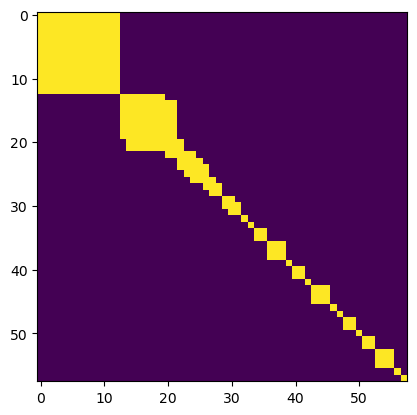

In [18]:
plt.imshow(mask)

In [19]:
# Make a distance matrix from the correlation matrix COR
mask = np.ones_like(COR)
CD = 1 - mask*COR
# make sure the diagonal is zero and the matrix is PD
CD = np.maximum(CD, CD.T)
CD -= np.diag(CD.diagonal())
CD=np.clip(CD,0,2)
cd_matrix = squareform(CD,force='tovector')

In [20]:
cd_matrix.shape

(1653,)

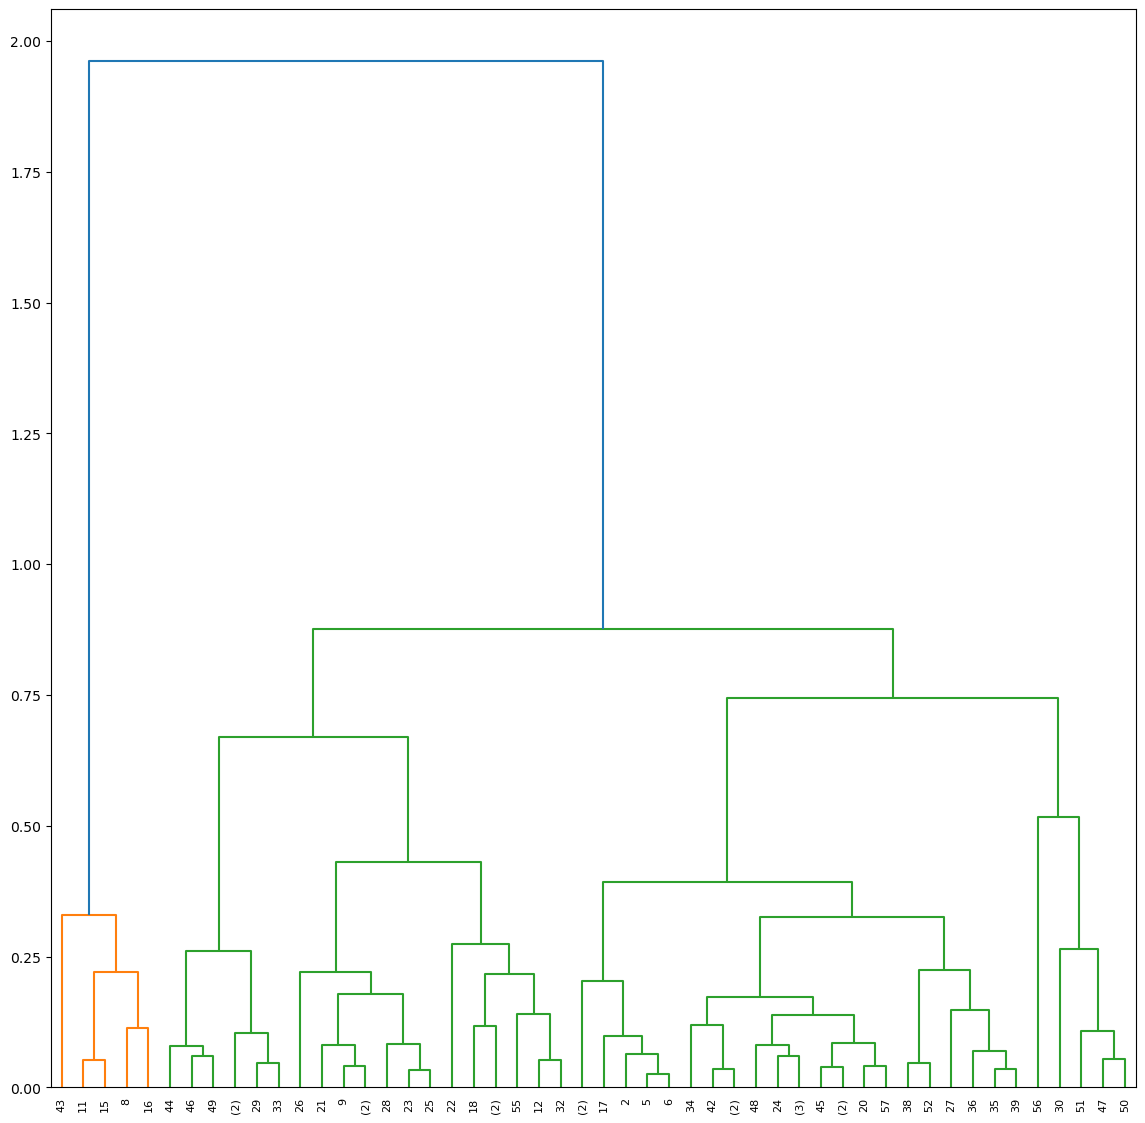

In [21]:
plt.figure(figsize=(14,14))
link_complete = hierarchy.linkage(cd_matrix, method='complete',  optimal_ordering=False)
hierarchy.dendrogram(link_complete, truncate_mode='lastp', p=50, labels=np.asarray(np.arange(CD.shape[0])))
labels_complete=hierarchy.fcluster(link_complete, t=0.25, criterion='distance')

In [22]:
labels_complete

array([ 9,  9,  8,  9,  8,  8,  8,  8,  1,  5,  5,  1,  6,  9,  9,  1,  1,
        8,  6,  5,  9,  5,  7,  5,  9,  5,  5, 10,  5,  4, 12,  9,  6,  4,
        9, 10, 10,  9, 10, 10,  4,  4,  9,  2,  3,  9,  3, 11,  9,  3, 11,
       11, 10,  6,  6,  6, 13,  9], dtype=int32)

In [23]:
np.unique(labels_complete).shape

(13,)

In [24]:
inds=np.argsort(labels_complete)
result = data_X.iloc[inds,:]
result['labels_complete']=labels_complete[inds]
luniq=np.unique(labels_complete[inds])

C:\Users\paavo\AppData\Local\Temp\ipykernel_20164\729970858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['labels_complete']=labels_complete[inds]


In [25]:
k=luniq[10]
cluster_ind = np.where(labels_complete[inds]==k)[0]
cluster_names = result.iloc[cluster_ind,0].to_numpy(dtype=str)
cluster_times = result.iloc[cluster_ind,5].to_numpy(dtype=float)
cluster_mass = result.iloc[cluster_ind,4].to_numpy(dtype=float)
cluster_masstimes = ["{}@{}".format(m,t) for m,t in zip(cluster_mass,cluster_times)]

cluster = result.iloc[cluster_ind,8:48].to_numpy(dtype=float).T
#df_cluster = pd.DataFrame(cluster, columns = ["V{}_RT{}".format(i,val) for i,val in enumerate(cluster_times)])
df_cluster = pd.DataFrame(cluster, columns = cluster_masstimes)
df_cluster['group']=groups.to_numpy(dtype=str)
print(cluster_times)

[5.447 5.664 4.86 ]


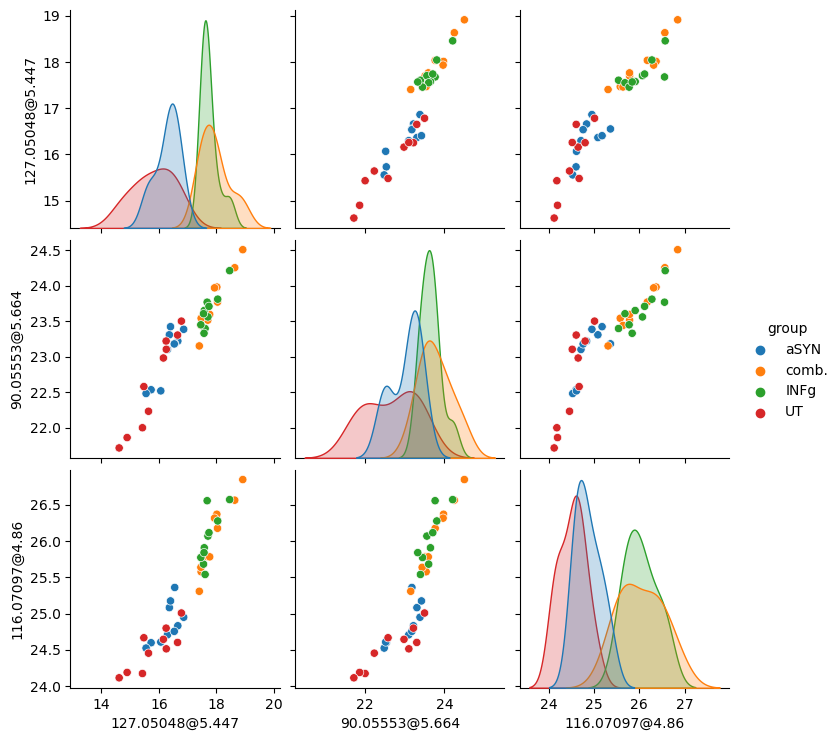

In [26]:
complete_pairplot(df_cluster, group_col='group')

In [27]:
cluster_names

array(['Imidazoleacetic acid', 'DL-Alanine', 'Proline'], dtype='<U20')

In [28]:
cluster_masstimes

['127.05048@5.447', '90.05553@5.664', '116.07097@4.86']

### Check the pvalues and tests for each peak (id'd by masstime)

In [29]:
mts, ps, ts = extract_pvalues(df_select,cluster_masstimes)

In [38]:
tle = fname + "\ncluster ID: {}".format(k)
display_pvalues(mts, ps, ts, tle)

cellshilicposALPHA0.05FC1.0MINVAR0.125.csv
cluster ID: 11
-----------------------
Peak: 127.05048@5.447
P-values: [4.2e-05, 0.000123, 0.000307, 0.001103]
Tests: ['aSYN--INFg', 'aSYN--comb.', 'comb.--UT', 'INFg--UT']
-----------------------
Peak: 90.05553@5.664
P-values: [0.037606]
Tests: ['comb.--UT']
-----------------------
Peak: 116.07097@4.86
P-values: [5e-06, 8.6e-05, 0.000185, 0.002086]
Tests: ['INFg--UT', 'aSYN--INFg', 'comb.--UT', 'aSYN--comb.']


### Clusters only using rtimes

In [48]:
dt=0.05
mask=np.asarray(np.abs(rtime-rtime.T)<=dt,dtype=int)
mask2assignments(mask)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        2.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,  6.,
        7.,  8.,  9., 10., 10., 11., 12., 13., 14., 14., 15., 15., 15.,
       16., 17., 17., 18., 19., 19., 19., 20., 21., 22., 22., 23., 24.,
       25., 26., 26., 26., 27., 28.])

## ANOVA

In [14]:
data =data_significant.iloc[sorted_ind+3,:] 
X=data.iloc[:,8:48].to_numpy(dtype=float).T

In [12]:
from statsmodels.formula.api import ols

In [19]:
data.iloc[2,0]

'13-hydroxy-alpha-tocopherol'

In [34]:
np.where(data.iloc[:,0]=="MFCD00042876")

(array([19]),)

In [35]:
k=19
print(data.iloc[k,0])
xdata = pd.DataFrame(np.hstack((X[:,k][:,np.newaxis],labels[:,np.newaxis])), columns=['area','group'])
res = ols(formula="area~0 + C(group)", data=xdata).fit()
res.summary()

MFCD00042876


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     20.05
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           8.21e-08
Time:                        13:02:46   Log-Likelihood:                -36.410
No. Observations:                  40   AIC:                             80.82
Df Residuals:                      36   BIC:                             87.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(group)[0.0]    17.1515      0.200     85.574      0.000      16.745      17.558
C(group)[1.0]    15.9549      0.200     79.604      0.000      15.548      16.361
C(group)[2.0]    15.5732      0.200     77.700      0.000      15.167      15.980
C(group)[3.0]    17.4154      0.200     86.891      0.000      17.009      17.822
==============================================================================
Omnibus:                       18.660   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.421
Skew:                          -1.449   Prob(JB):                     4.98e-06
Kurtosis:                       5.500   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
res.tvalues

C(group)[0.0]    85.574404
C(group)[1.0]    79.604158
C(group)[2.0]    77.699851
C(group)[3.0]    86.891238
dtype: float64